<a href="https://colab.research.google.com/github/luami22/Nien_luan1/blob/main/Nien_Luan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 52, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 48)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32448)             0         
                                                                 
 dense (Dense)               (None, 256)               8

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 46ms/step
Accuracy : 100.00%


Recall :100.00%


Precision : 100.00%


F1 : 100.00%




<ipython-input-5-2e2ed2fee889>:127: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
<ipython-input-5-2e2ed2fee889>:128: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


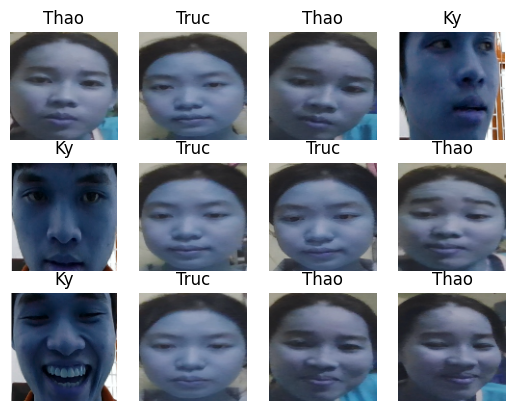

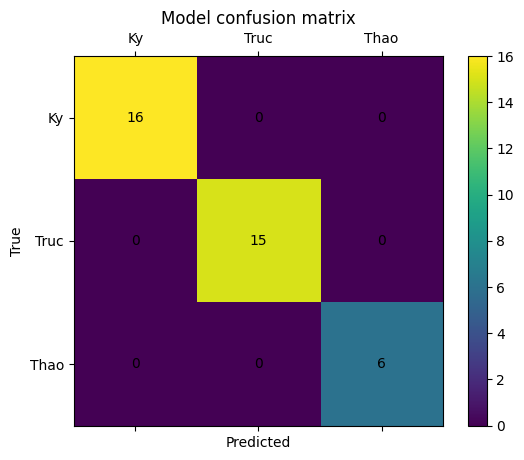

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import utils
import tensorflow as tf
from tensorflow import keras

# ========================duong dan======================================

# path="./vtho/"
# categories = ['BD_KT','DT_mu','vtho_1']

# path="./tay/"
# categories = ['BD_KT','DT_mu', 'tay_1', 'tay_2','tay_3']

# path="./chan/"
# categories = ['BD_KT', 'chan_1', 'chan_2','DT_mu']

path="/content/All/"
categories = ['Ky', 'Truc', 'Thao']

# path="./bung/"
# categories = ['BD_KT', 'bung_1', 'bung_2','bung_3','DT_mu']

# path="./toanthan/"
# categories = ['BD_KT','DT_mu','toanthan_1', 'toanthan_2','toanthan_3']

# path="./nhay/"
# categories = ['BD_KT','DT_mu', 'nhay_1', 'nhay_2']

# path="./dieuhoa/"
# categories = ['BD_KT', 'dieuhoa_1', 'dieuhoa_2','DT_mu']

# =============================resize kich thuoc anh=================================

data = []#dữ liệu
labels = []#nhãn
imagePaths = []
HEIGHT = 112
WIDTH = 112
# 24 24
N_CHANNELS = 3

# ===========================lay ngau nhien anh===================================

for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k])

import random
random.shuffle(imagePaths)
# print(imagePaths[:10])

# =======================tien xu ly=======================================

for imagePath in imagePaths:
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    label = imagePath[1]
    labels.append(label)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
# plt.show()

# ============================chia tap dl==================================

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=25, shuffle=True)# random_state=30)

trainY = utils.to_categorical(trainY, len(categories))

# ===========================huan luyen===================================

EPOCHS = 15
INIT_LR = 1e-3
BS =24

class_names = categories


model = Sequential()

model.add(Convolution2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(WIDTH, HEIGHT, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Convolution2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(len(class_names), activation='softmax')) #thay thanh cac giai thuat như knn, bayes...

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.fit(trainX, trainY, batch_size=BS, epochs=EPOCHS, verbose=1)

model.save("lenet.h5")
# ==========================kiem tra su dung cua mo hinh====================================

from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
# plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))
print("\n")
# ----------------------------------------------

recall= recall_score(testY, predictions,average='weighted')
print("Recall :%.2f%%" % (recall*100))
print("\n")
# ----------------------------------------------

precision = precision_score(testY, predictions,average='weighted')
print("Precision : %.2f%%" % (precision*100.0))
print("\n")
# ----------------------------------------------

f1 = f1_score(testY, predictions,average='weighted')
print("F1 : %.2f%%" % (f1*100.0))
print("\n")

# ==============================dua anh vao kiem tra================================

# from numpy import argmax
# import PIL
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image
# img_path="./nhan480.jpg"

# img=image.load_img(img_path,target_size=(32,32))
# img_array=image.img_to_array(img)
# from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
# img_batch=np.expand_dims(img_array, axis=0)
# img_preprocessed=preprocess_input(img_batch)

# pred=model.predict(img_preprocessed)
# Res=argmax(pred,axis=1)
# print(pred)

# plt.imshow(img)
# plt.show()
# print(categories[Res[0]],pred[0][Res[0]]*100)




In [4]:
!unrar x /content/All.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/All.rar


Would you like to replace the existing file All/Ky/Ky_0253600F2616f8dE.png
 66905 bytes, modified on 2024-01-25 04:37
with a new one
 66905 bytes, modified on 2024-01-25 04:37

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break
